In [49]:
from selenium import webdriver as wd 
from bs4 import BeautifulSoup 
import time 
import openpyxl

In [50]:
import matplotlib.pyplot as plt
from konlpy.tag import Hannanum
from bs4 import BeautifulSoup
import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.keys import Keys
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud

In [51]:
font_path_input = 'C:/Windows/Fonts/malgun.ttf'

In [52]:
driver = wd.Chrome(executable_path="C:/Users/mrclo/Desktop/chromedriver") 
url = 'https://www.youtube.com/watch?v=iKVn9Asu61c' 
driver.get(url) 
last_page_height = driver.execute_script("return document.documentElement.scrollHeight") 

In [53]:
while True: 
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);") 
    time.sleep(3) 
    new_page_height = driver.execute_script("return document.documentElement.scrollHeight") 
    
    if new_page_height == last_page_height: 
        break 
    last_page_height = new_page_height

In [54]:
html_source = driver.page_source
driver.close()
soup = BeautifulSoup(html_source, 'html.parser')

In [55]:
youtube_user_IDs = soup.select('div#header-author > a > span')

In [56]:
youtube_comments = soup.select('yt-formatted-string#content-text')

In [57]:
str_youtube_userIDs = []
str_youtube_comments = []

for i in range(len(youtube_user_IDs)):
    str_tmp = str(youtube_user_IDs[i].text)
#     print(str_tmp)
    str_tmp = str_tmp.replace('\n', '')
    str_tmp = str_tmp.replace('\t', '')
    str_tmp = str_tmp.replace('                ','')
    str_youtube_userIDs.append(str_tmp)
    
    str_tmp = str(youtube_comments[i].text) 
    str_tmp = str_tmp.replace('\n', '')
    str_tmp = str_tmp.replace('\t', '')
    str_tmp = str_tmp.replace('               ', '')
   
    str_youtube_comments.append(str_tmp)

In [58]:
for i in range(len(str_youtube_userIDs)):
    print(str_youtube_userIDs[i], str_youtube_comments[i])

            묻섹나게           철판 닭갈비는 빨간머리 아줌마네가 진짜 혜잔데 여러분들은 거기로 가세여 학생들 가면 음료수나 사리도 서비스로 주심
            sara D           Who ever puts the English subtitles needs a pay raise.
            extraterrestrial friend           저골목에서 빨간머리아줌마집이 제일맛있는데.. 딱봐도 거기만 손님많잖아요ㅋㅋ
            langdynes           oh man i don't think I've ever had legit 닭갈비 but everything in this ep looked sooo good! and i almost lost it when they brought out the 더덕 that's one of my favorite side dishes 😭😭
            Apostle Paul           춘천 명동에 닭갈비 골목은 관광객들이나 가는거죠... 진짜베기는 차타고 나가야 하는 통나무집이나 일점오, 강대쪽 우미가 진짜베기 맛집이죠.
            저는뿡치에요           메밀엨ㅋㅋㅋㅋㅋㅋ쇠를 대면 맛이없는뎈ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ젓가락이 쇠임ㅋㅋㅋㅋㅌㅋㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋ웃겨디졐ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
            morrison6666           댓글보니 결론 로컬들은 저길 안간다는 말이구만......똑같네.. 부산에서 회 먹으러 자갈치 안간다는거랑...차라리 민락 회타운에서 회 끊어 먹지.. ㅋㅋ
            Winona Daphne           they cut him everytime he talks about his past 😂
            Spider Yoongi           I just want to thank whoever does the English subtitles. Your sense of

In [59]:
comments =[]
for i in range(len(str_youtube_userIDs)):
    roww = []
    roww.append(str_youtube_comments[i])
    comments.append(roww)

In [60]:
youtube_index_list = []
for i in range(len(str_youtube_userIDs)):
    roww = []
    roww.append(str_youtube_userIDs[i])
    roww.append(str_youtube_comments[i])
    youtube_index_list.append(roww)

In [61]:
print(youtube_index_list)

[['            묻섹나게          ', '철판 닭갈비는 빨간머리 아줌마네가 진짜 혜잔데 여러분들은 거기로 가세여 학생들 가면 음료수나 사리도 서비스로 주심'], ['            sara D          ', 'Who ever puts the English subtitles needs a pay raise.'], ['            extraterrestrial friend          ', '저골목에서 빨간머리아줌마집이 제일맛있는데.. 딱봐도 거기만 손님많잖아요ㅋㅋ'], ['            langdynes          ', "oh man i don't think I've ever had legit 닭갈비 but everything in this ep looked sooo good! and i almost lost it when they brought out the 더덕 that's one of my favorite side dishes 😭😭"], ['            Apostle Paul          ', '춘천 명동에 닭갈비 골목은 관광객들이나 가는거죠... 진짜베기는 차타고 나가야 하는 통나무집이나 일점오, 강대쪽 우미가 진짜베기 맛집이죠.'], ['            저는뿡치에요          ', '메밀엨ㅋㅋㅋㅋㅋㅋ쇠를 대면 맛이없는뎈ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ젓가락이 쇠임ㅋㅋㅋㅋㅌㅋㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋ웃겨디졐ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ'], ['            morrison6666          ', '댓글보니 결론 로컬들은 저길 안간다는 말이구만......똑같네.. 부산에서 회 먹으러 자갈치 안간다는거랑...차라리 민락 회타운에서 회 끊어 먹지.. ㅋㅋ'], ['            Winona Daphne          ', 'they cut him everytime he talks about his past 😂'], ['            Spider Yoongi          ', '

In [62]:
import pandas as pd 
pd_data = {"ID":str_youtube_userIDs, "Comment":str_youtube_comments} 
youtube_pd = pd.DataFrame(pd_data)
print(youtube_pd)

                                               ID  \
0                                  묻섹나게             
1                                sara D             
2               extraterrestrial friend             
3                             langdynes             
4                          Apostle Paul             
5                                저는뿡치에요             
6                          morrison6666             
7                         Winona Daphne             
8                         Spider Yoongi             
9                           Chowna Thor             
10                           hyun aaron             
11                                  나라김             
12                                  오상근             
13                            nur afira             
14                                 욤이TV             
15                                KENZO             
16                                  강현박             
17                                나만볼거야       

In [63]:
youtube_pd.to_csv('youtube_crawling2.csv', mode='w', encoding='utf-8-sig')

In [64]:
texts = ''
for i in list(youtube_pd['Comment']):
    texts += i

In [65]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           "]+", flags=re.UNICODE)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')
comment_result = []
str_result = ''
for i in texts:
    tokens = re.sub(emoji_pattern, "", i)
    tokens = re.sub(han, "", tokens)
    str_result += tokens
    comment_result.append(tokens)
    #내용 정제(불필요한 이모지 등 삭제)

In [66]:
hannanum = Hannanum()
noun_words = list(hannanum.nouns(str_result))
#가장 많이 중복되는 단어를 내림차순으로 정렬. 그리고 dict 타입으로 캐스팅.

In [67]:
count = Counter(noun_words)
words = dict(count.most_common())
print(words)

{'12000원': 6, '진짜': 5, '닭갈비': 4, '11000원': 4, '신북읍': 4, '원조': 3, '사람': 3, '7500원': 3, '7000원': 3, '거기': 2, '춘천': 2, '대': 2, '15': 2, '이': 2, '장사': 2, '곳': 2, '후만로': 2, '공지': 2, '충열로16번길': 2, '철판': 1, '빨간머리': 1, '아줌마네가': 1, '혜잔데': 1, '여러분들': 1, '가세': 1, '학생들': 1, '음료수': 1, '사리': 1, '서비스': 1, '주심Who': 1, 'raise저골목': 1, '빨간머리아줌마집': 1, '제일맛': 1, '딱봐': 1, '손님많잖아요oh': 1, '더덕': 1, '명동': 1, '골목': 1, '관광객들': 1, '가는거죠': 1, '진짜베기': 1, '통나무집': 1, '일점오': 1, '강대쪽': 1, '우미': 1, '진짜베': 1, '맛집이죠메밀엨쇠': 1, '맛이없는뎈젓가락': 1, '쇠임웃겨디졐댓글보': 1, '결론': 1, '로컬들': 1, '저길': 1, '안간다': 1, '말이구만똑같네': 1, '부산': 1, '자갈치': 1, '안간다는거랑차라리': 1, '민락': 1, '회타운': 1, 'You’re': 1, '❤️❤️': 1, 'US우미': 1, '우성': 1, '춘천사람들': 1, '자주가': 1, '유명': 1, '그이름': 1, '가족들': 1, '운영': 1, '체인점': 1, '소스': 1, '납품': 1, '것': 1, '거임맛있는건': 1, '당연해야하는거': 1, '가격': 1, '창렬이네': 1, '더덕구이': 1, '한접시': 1, '만오천원': 1, '실화냐빨간머리': 1, '아주머니': 1, '개쿨해': 1, '2': 1, '08': 1, '토론': 1, '거': 1, '첨봄7:14': 1, '아줌마': 1, '색히가맛': 1, '다똑같음': 1, '원조숯불닭불고기': 1, '검증': 1, '원조집': 1, '막국

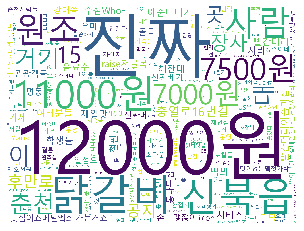

In [68]:
words_ = words
words_save = pd.DataFrame(words_, index=[0])
words_save.to_csv("youtube_crawling_words.csv", mode='w', encoding='utf-8-sig')

wordcloud = WordCloud(font_path=font_path_input, background_color='white', width=1600, height=1200)
cloud = wordcloud.generate_from_frequencies(words)
plt.imshow(cloud)
plt.axis('off')
plt.show()